In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('../paper.mplstyle')

from typing import Callable
from matplotlib import colors

from solar_common.utils import (
    oscnext_yearmaker,
    ps_yearmaker,
    prepare_data_distribution,
    prepare_simulation_distribution
)

from glob import glob

In [2]:
from solar_common.event_reader import Selection

In [3]:
livetime = 11 * 10**7.5 # 11 "years"

In [4]:
oscnext_data_file = "/data/ana/BSM/IC86_all_energy_solar_WIMP/data/analysis_distributions/oscnext_scrambled_data_no_muon.h5"
oscnext_mc_file = "/data/ana/BSM/IC86_all_energy_solar_WIMP/data/analysis_distributions/oscnext_mc_no_muon.h5"
ps_data_file = "/data/ana/BSM/IC86_all_energy_solar_WIMP/data/analysis_distributions/ps_scrambled_data.h5"
ps_mc_file = "/data/ana/BSM/IC86_all_energy_solar_WIMP/data/analysis_distributions/IC86_pass2_MC_distributions.h5"
# ps_mc_scramble_file = "/data/ana/BSM/IC86_all_energy_solar_WIMP/data/analysis_distributions/ps_mc_scramble.h5"
model = "5-500"

# Load up the simualtion
with h5.File(oscnext_mc_file, "r") as h5f:
    osc_nom_sig = livetime * prepare_simulation_distribution(h5f, model)
with h5.File(ps_mc_file, "r") as h5f:
    ps_nom_sig = livetime * prepare_simulation_distribution(h5f, model)
# with h5.File(ps_mc_scramble_file, "r") as h5f:
#     ps_scr_sig = livetime * prepare_simulation_distribution(h5f, model)
    
# Load up the scrambled data
with h5.File(oscnext_data_file, "r") as h5f:
    osc_nom_bg = prepare_data_distribution(h5f, oscnext_yearmaker)
with h5.File(ps_data_file, "r") as h5f:
    ps_nom_bg = prepare_data_distribution(h5f, ps_yearmaker)
# print(ps_scr_sig.sum(), ps_nom_sig.sum())

In [5]:
def plot_analysis_distribution(arr: np.ndarray, figname="", show=True, ax=None, **kwargs):
    
    if arr.ndim!=2:
        raise ValueError("arr ndim=={arr.ndim}!=2.")
    
    figsize = (6, 5)
    
    if ax is None:
        if "figsize" in kwargs:
            figsize = kwargs["figsize"]
        fig, ax = plt.subplots(figsize=figsize)
    
    z = np.log10(arr.T[::-1])
    
    vmin = np.min(z[np.isfinite(z)])
    if "vmin" in kwargs:
        vmin = kwargs["vmin"]
    vmax = np.max(z)
    if "vmax" in kwargs:
        vmax = kwargs["vmax"]
        
    cmap = "Greys"
    if "cmap" in kwargs:
        cmap = kwargs["cmap"]
        
    im = ax.imshow(
        z,
        extent=[0, 180, -3, 6],
        vmin=vmin,
        vmax=vmax,
        cmap=cmap,
        aspect="auto"
    )
    
    # Configure the xaxis
    xmin = 0
    if "xmin" in kwargs:
        xmin = kwargs["xmin"]
    xmax = 180
    if "xmax" in kwargs:
        xmax = kwargs["xmax"]
    ax.set_xlim(xmin, xmax)
    
    xlabel = r"$\psi~\left[^{\circ}\right]$"
    if "xlabel" in kwargs:
        xlabel = kwargs["xlabel"]
    ax.set_xlabel(xlabel)
    
    # Configure the yaxis
    ymin = 0
    if "ymin" in kwargs:
        ymin = kwargs["ymin"]
    ymax = 6
    if ymax in kwargs:
        ymax = kwargs["ymax"]
    ax.set_ylim(ymin, ymax)
    
    ylabel = r"$E_{\rm{reco}}~\left[{\rm{GeV}}\right]$"
    if "ylabel" in kwargs:
        ylabel = kwargs["ylabel"]
    ax.set_ylabel(ylabel)
    
    yticks = np.arange(np.ceil(ymin), np.ceil(ymax))
    ytick_labels = [r"$10^{%d}$" % yt for yt in yticks]
    ax.set_yticks(yticks)
    ax.set_yticklabels(ytick_labels)
    
    [border.set_linewidth(2) for border in ax.spines.values()]
    
    # Configure colorbar
    
    cbar_label = r"$\log_{10}\left(N_{\rm{evts.}}\right)$"
    if "cbar_label" in kwargs:
        cbar_label = kwargs["cbar_label"]
        
    cbar = plt.colorbar(im, label=cbar_label)
    [border.set_linewidth(2) for border in cbar.ax.spines.values()]
    
    # Set a title
    if "title" in kwargs:
        ax.set_title(kwargs["title"], fontsize=15)
        
    if "text" in kwargs:
        ax.text(0.5, 5.5, kwargs["text"])
    
    if figname:
        plt.savefig(figname)
    
    if show:
        plt.show()
        
    if "return_ax" in kwargs:
        if kwargs["return_ax"]:
            return ax
    plt.close()

## Let's take a look at the signal and background over the whole sky

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


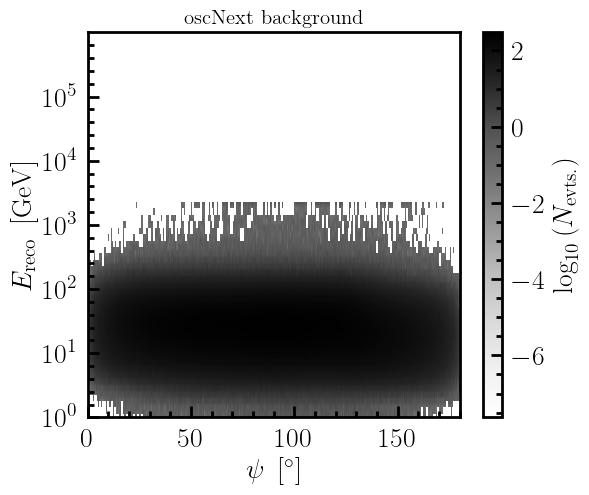

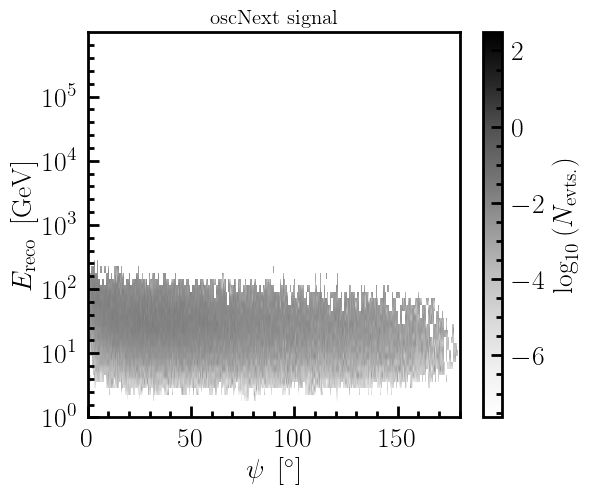

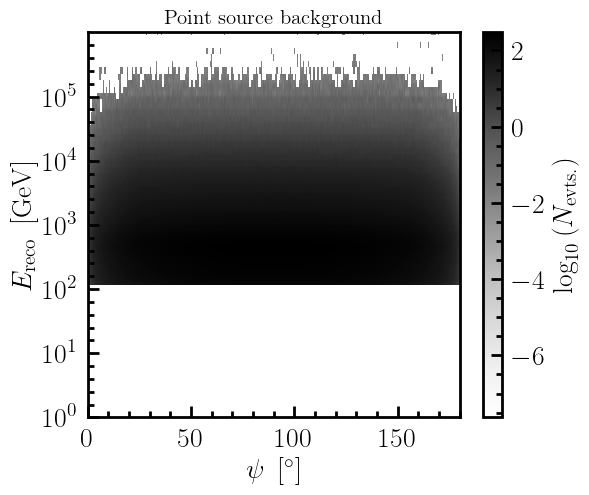

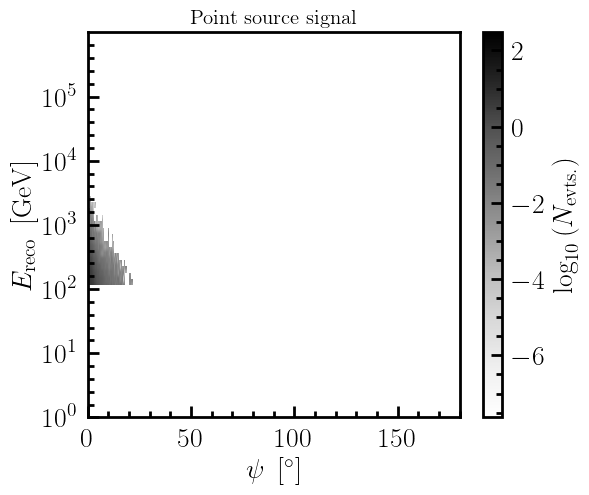

NameError: name 'ps_scr_sig' is not defined

In [7]:
# Find largest count in a bin
vmax = np.log10(np.max([
    osc_nom_bg.sum(axis=-1).max(),
    osc_nom_sig.sum(axis=-1).max(),
    ps_nom_bg.max(),
    ps_nom_sig.max()
]))

vmin=-3
# Find the smallest, non-zero count
vmin = np.log10(np.min([
    osc_nom_bg.sum(axis=-1)[osc_nom_bg.sum(axis=-1)!=0].min(),
    osc_nom_sig.sum(axis=-1)[osc_nom_sig.sum(axis=-1)!=0].min(),
    ps_nom_sig[ps_nom_sig!=0].min(),
    ps_nom_bg[ps_nom_bg!=0].min()
]))

plot_analysis_distribution(
    osc_nom_bg.sum(axis=-1),
    title="oscNext background",
    vmin=vmin,
    vmax=vmax
)
plot_analysis_distribution(
    osc_nom_sig.sum(axis=-1),
    title="oscNext signal",
    vmin=vmin,
    vmax=vmax
)
plot_analysis_distribution(
    ps_nom_bg,
    title="Point source background",
    vmin=vmin,
    vmax=vmax
)
plot_analysis_distribution(
    ps_nom_sig,
    title="Point source signal",
    vmin=vmin,
    vmax=vmax
)
plot_analysis_distribution(
    ps_scr_sig,
    title="Point source signal, scrambled",
    vmin=vmin,
    vmax=vmax
)

## Now let's take a look at it in the 20 degrees near the Sun

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


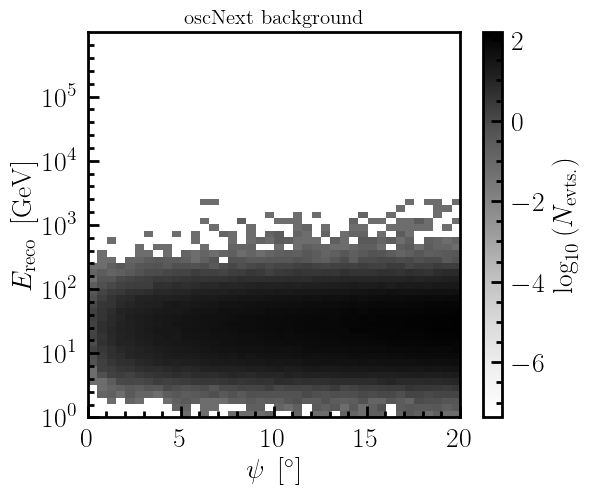

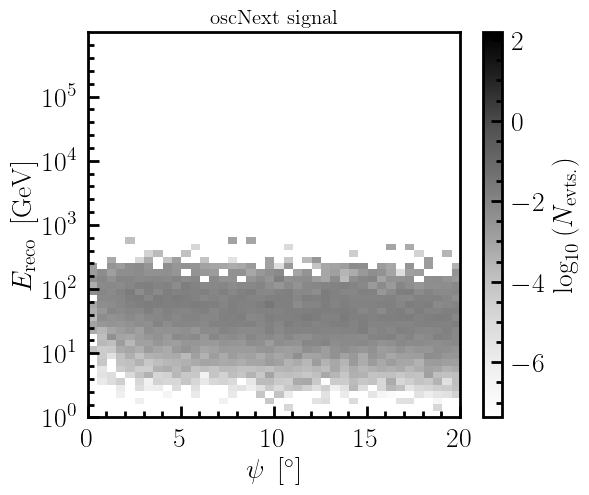

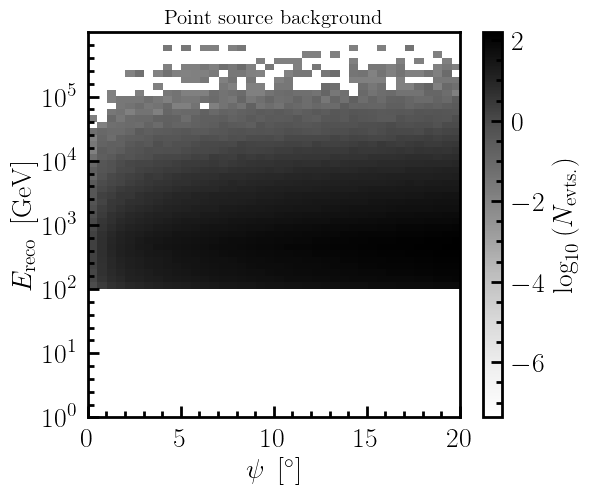

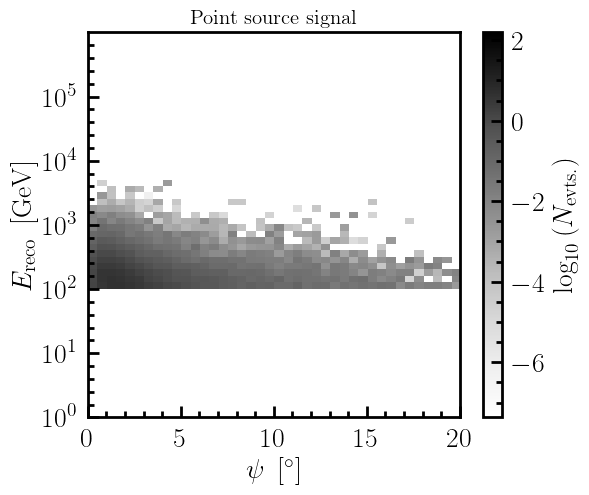

In [8]:
xmax = 20

# Find largest count in a bin
vmax = np.log10(np.max([
    osc_nom_bg.sum(axis=-1)[:int(2*xmax), :].max(),
    osc_nom_sig.sum(axis=-1)[:int(2*xmax), :].max(),
    ps_nom_bg[:int(2*xmax), :].max(),
    ps_nom_sig[:int(2*xmax), :].max()
]))

vmin=-3
# Find the smallest, non-zero count
vmin = np.log10(np.min([
    osc_nom_bg.sum(axis=-1)[:int(2*xmax), :][osc_nom_bg.sum(axis=-1)[:int(2*xmax), :]!=0].min(),
    osc_nom_sig.sum(axis=-1)[:int(2*xmax), :][osc_nom_sig.sum(axis=-1)[:int(2*xmax), :]!=0].min(),
    ps_nom_sig[:int(2*xmax), :][ps_nom_sig[:int(2*xmax), :]!=0].min(),
    ps_nom_bg[:int(2*xmax), :][ps_nom_bg[:int(2*xmax), :]!=0].min()
]))

plot_analysis_distribution(
    osc_nom_bg.sum(axis=-1),
    title="oscNext background",
    vmin=vmin,
    vmax=vmax,
    xmax=xmax
)
plot_analysis_distribution(
    osc_nom_sig.sum(axis=-1),
    title="oscNext signal",
    vmin=vmin,
    vmax=vmax,
    xmax=xmax
)
plot_analysis_distribution(
    ps_nom_bg,
    title="Point source background",
    vmin=vmin,
    vmax=vmax,
    xmax=xmax
)
plot_analysis_distribution(
    ps_nom_sig,
    title="Point source signal",
    vmin=vmin,
    vmax=vmax,
    xmax=xmax
)

In [8]:
def plot_triptych(arr: np.ndarray, show=True, figname="", **kwargs) -> None:
    if arr.ndim != 3:
        raise ValueError("Expecting ndim=3. Got ndim={arr.ndim}")
    
    z = np.log10(arr)
    
    # Configure imshow options
    vmin = np.min(z[np.isfinite(z)])
    vmax = np.max(z)
    if "vmax" in kwargs:
        vmax = kwargs["vmax"]
    if "vmin" in kwargs:
        vmin = kwargs["vmin"]
        
    cmap = "Greys"
    if "cmap" in kwargs:
        cmap = kwargs["cmap"]
    
    figsize = (15, 5)
    if "figsize" in kwargs:
        figsize = kwargs["figsize"]
    fig = plt.figure(figsize=figsize)
    
    gs = GridSpec(1, 3, wspace=0.02)
    
    # Configure xaxis
    xmin = 0
    if "xmin" in kwargs:
        xmin = kwargs["xmin"]
    xmax = 180
    if "xmax" in kwargs:
        xmax = kwargs["xmax"]
    
    xlabel = r"$\psi~\left[^{\circ}\right]$"
    if "xlabel" in kwargs:
        xlabel = kwargs["xlabel"]
    
    # Configure the yaxis
    ymin = 0
    if "ymin" in kwargs:
        ymin = kwargs["ymin"]
    ymax = 6
    if ymax in kwargs:
        ymax = kwargs["ymax"]
    
    
    ylabel = r"$E_{\rm{reco}}~\left[{\rm{GeV}}\right]$"
    if "ylabel" in kwargs:
        ylabel = kwargs["ylabel"]
    
    yticks = np.arange(np.ceil(ymin), np.ceil(ymax))
    ytick_labels = [r"$10^{%d}$" % yt for yt in yticks]

    # Configure colorbar
    
    cbar_label = r"$\log_{10}\left(N_{\rm{evts.}}\right)$"
    if "cbar_label" in kwargs:
        cbar_label = kwargs["cbar_label"]

    for idx, spec in enumerate(gs):
        ax = fig.add_subplot(spec)
        im = ax.imshow(
            z[:,:,idx].T[::-1],
            extent=[0, 180, -3, 6],
            vmin=vmin,
            vmax=vmax,
            cmap=cmap,
            aspect="auto"
        )
        
        ax.set_ylim(ymin, ymax)
        ax.set_xlabel(xlabel)
        ax.set_xlim(xmin, xmax)
        [border.set_linewidth(2) for border in ax.spines.values()]
        
        if idx==0:
            ax.set_ylabel(ylabel)
            ax.set_yticks(yticks)
            ax.set_yticklabels(ytick_labels)
        else:
            ax.set_yticks(yticks)
            ax.set_yticklabels([])
            
#         if idx==1:
#             cbar = plt.colorbar(im, label=cbar_label, location="top")
#             [border.set_linewidth(2) for border in cbar.ax.spines.values()]

    fig.subplots_adjust(right=0.835)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax, label=cbar_label)
    [border.set_linewidth(2) for border in cbar.ax.spines.values()]
        
    if figname:
        plt.savefig(figname)
    
    if show:
        plt.show()

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


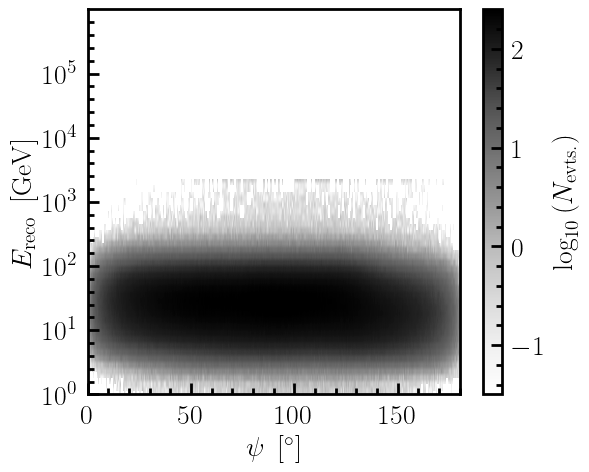

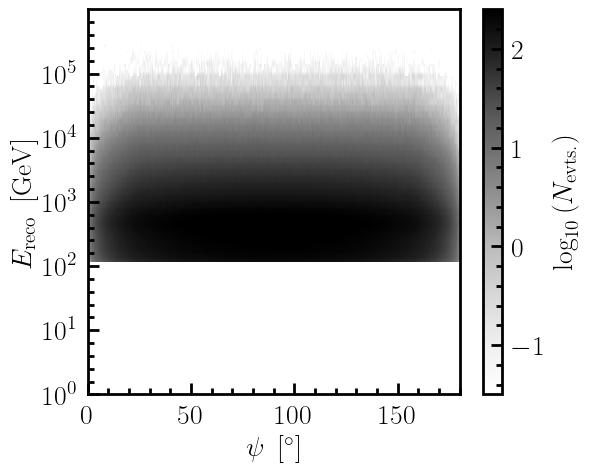

In [13]:
plot_analysis_distribution(
    osc_nom_bg.sum(axis=-1),
    figname="figures/osc_bg_180deg.pdf",
    vmin=-1.5,
    vmax=2.4,
)
plot_analysis_distribution(
    ps_nom_bg,
    figname="figures/ps_bg_180deg.pdf",
    vmin=-1.5,
    vmax=2.4,
)

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


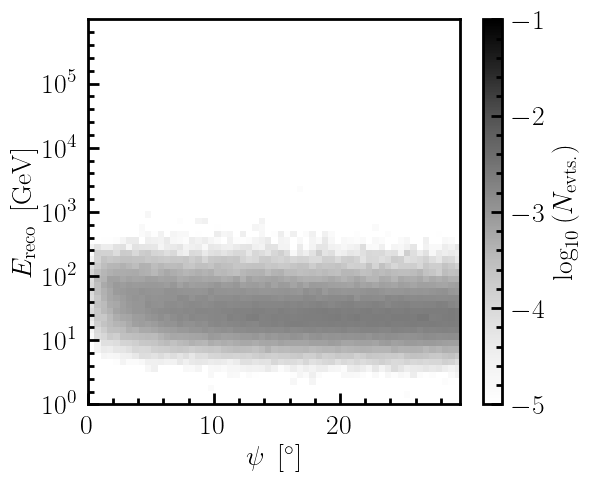

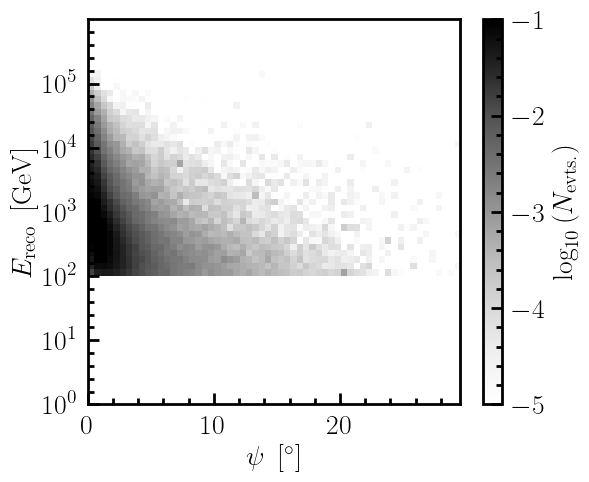

In [10]:
plot_analysis_distribution(
    osc_nom_sig.sum(axis=-1),
    figname="figures/osc_sig_295deg.pdf",
    vmin=-5,
    vmax=-1,
    xmax=29.5,
#     cmap="cool"
)
plot_analysis_distribution(
    ps_nom_sig,
    figname="figures/ps_sig_295deg.pdf",
    vmin=-5,
    vmax=-1,
    xmax=29.5,
#     cmap="cool"
)

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


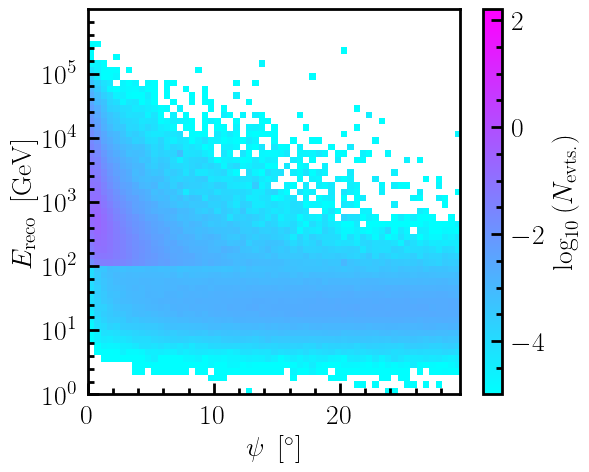

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


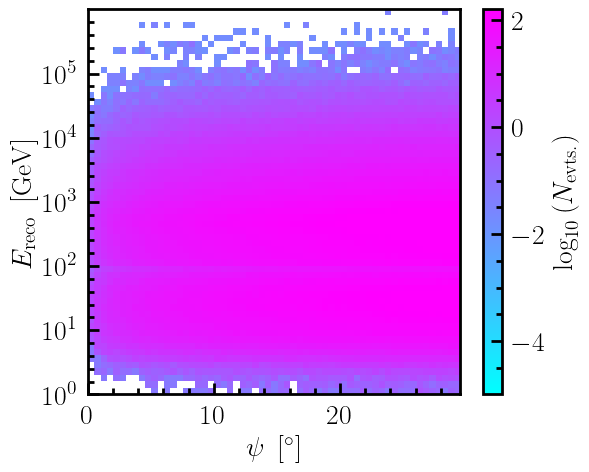

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


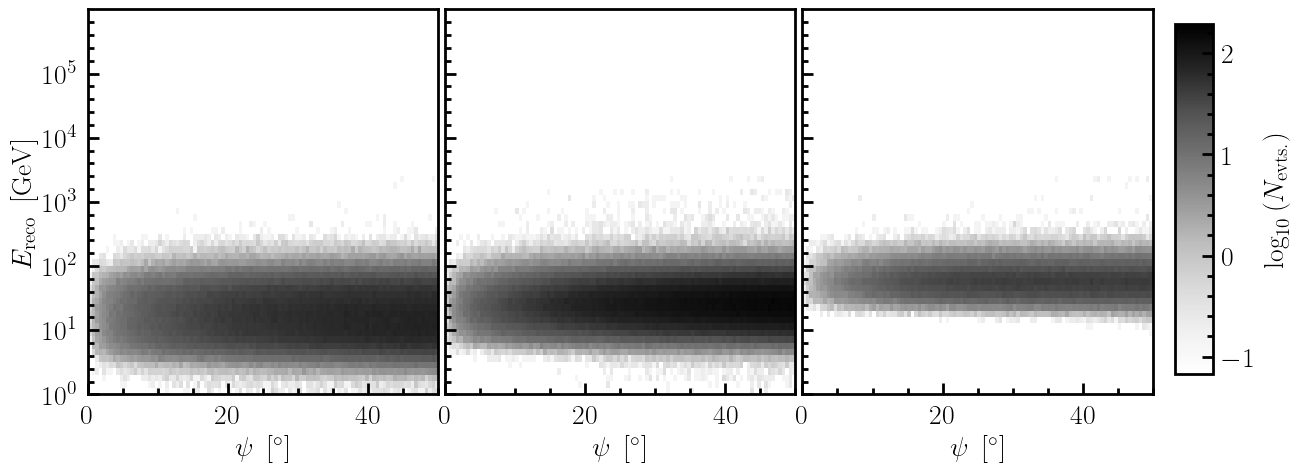

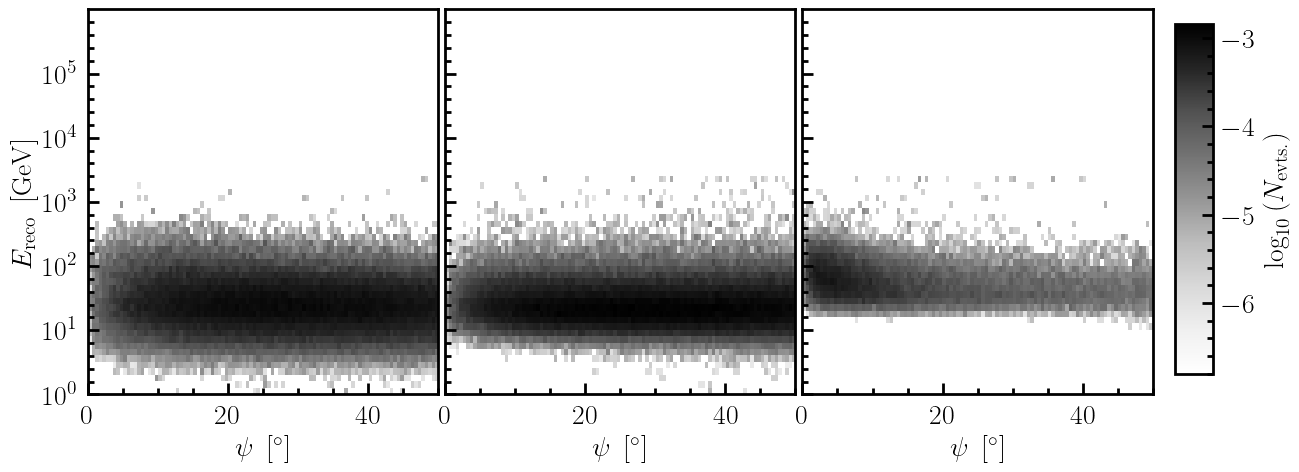

In [9]:
plot_analysis_distribution(
    osc_nom_sig.sum(axis=-1) + ps_nom_sig,
    figname="figures/combined_sig_295deg.pdf",
    vmin=-5,
    vmax=2.2,
    xmax=29.5,
#     cmap="cool"
)
plot_analysis_distribution(
    osc_nom_bg.sum(axis=-1) + ps_nom_bg,
    xmax=29.5,
    vmin=-5,
    vmax=2.2,
    figname="figures/combined_bg_295deg.pdf",
#     cmap="cool"
)

plot_triptych(
    osc_nom_bg,
    xmax=50
)

plot_triptych(
    osc_nom_sig,
        qxmax=50
)

In [15]:
plot_triptych(prepare_data_distribution(oscNext_scramble, oscnext_yearmaker), vmax=2.2)
plot_triptych(prepare_data_distribution(oscNext_scramble_no_muon, oscnext_yearmaker), vmax=2.2)
plot_triptych(prepare_data_distribution(oscNext_scramble_no_muon_no_lowup, oscnext_yearmaker), vmax=2.2)
plot_triptych(prepare_data_distribution(oscNext_scramble, oscnext_yearmaker), vmax=2.2, xmax=12)
plot_triptych(prepare_data_distribution(oscNext_scramble_no_muon, oscnext_yearmaker), vmax=2.2, xmax=12)
plot_triptych(prepare_data_distribution(oscNext_scramble_no_muon_no_lowup, oscnext_yearmaker), vmax=2.2, xmax=12)

NameError: name 'plot_triptych' is not defined

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


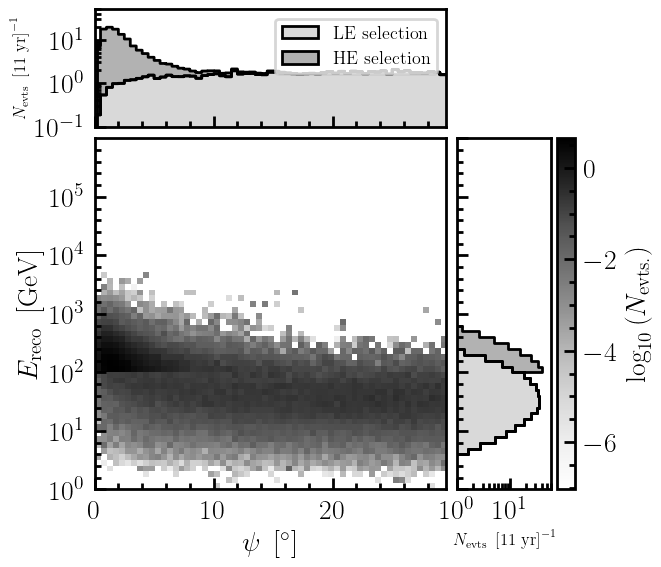

In [22]:
a1 = osc_nom_sig.sum(axis=-1)
a2 = ps_nom_sig

# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(3, 1), height_ratios=(1, 3),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])

ax_histx = fig.add_subplot(gs[0, 0])
ax_histy = fig.add_subplot(gs[1, 1])

xlim = (0, 29.5)

ax_histy.set(
    yticklabels = [],
    ylim=(0,6),
    xscale="log",
    xlabel=r"$N_{\rm{evts}}~\left[11~{\rm{yr}}\right]^{-1}$",
    xlim=(1, 60),
)
ax_histy.set_xlabel(xlabel=r"$N_{\rm{evts}}~\left[11~{\rm{yr}}\right]^{-1}$", fontsize=12)
ax_histx.set(
    xticklabels = [],
    yscale="log",
    xlim=xlim,
    ylim=(1e-1, 50),
)
ax_histx.set_ylabel(ylabel=r"$N_{\rm{evts}}~\left[11~{\rm{yr}}\right]^{-1}$", fontsize=12)

kwargs = {
    "step": "mid",
    "edgecolor": "k"
}

ax_histx.fill_between(
    np.linspace(0.25, 179.75, 360),
    np.zeros(360),
    a1.sum(axis=1),
    label="LE selection",
    facecolor=colors.to_rgb("k") + (0.15,),
    **kwargs
)

ax_histx.fill_between(
    np.linspace(0.25, 179.75, 360),
    a1.sum(axis=1),
    (a1+a2).sum(axis=1),
    facecolor=colors.to_rgb("k") + (0.3,),
    label="HE selection",
    **kwargs
)

ax_histy.fill_betweenx(
    np.linspace(-2.95, 5.95, 90),
    a1.sum(axis=0),
    facecolor=colors.to_rgb("k") + (0.15,),
    **kwargs
)

ax_histy.fill_betweenx(
    np.linspace(-2.95, 5.95, 90),
    a1.sum(axis=0),
    (a1 + a2).sum(axis=0),
    facecolor=colors.to_rgb("k") + (0.3,),
    **kwargs
)

ax_histx.legend(fontsize=13, loc=1)

plot_analysis_distribution(
    a1+a2,
    ax=ax,
    xmax=xlim[1],
#     vmin=-5,
#     vmax=2.2,
#     cmap="cool",
#     figname="figures/combined_sig_with_proj_295deg.pdf",
)

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


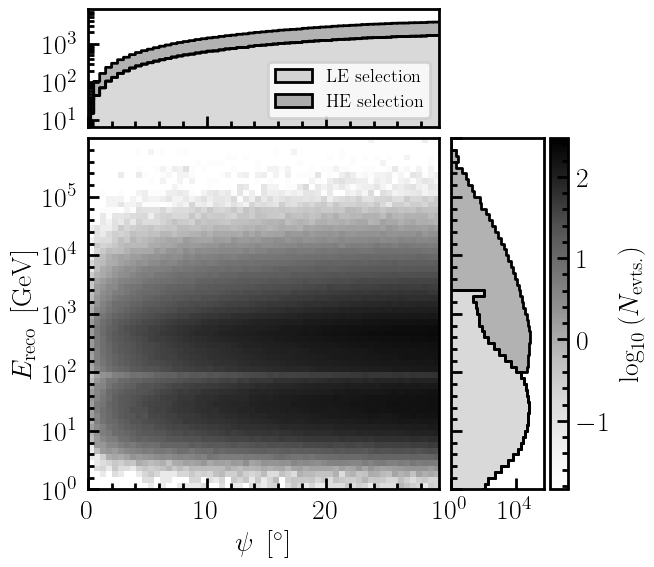

In [9]:
a1 = osc_nom_bg.sum(axis=-1)
a2 = ps_nom_bg

# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(3, 1), height_ratios=(1, 3),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])

ax_histx = fig.add_subplot(gs[0, 0])
ax_histy = fig.add_subplot(gs[1, 1])

xlim = (0, 29.5)

ax_histy.set(
    yticklabels = [],
    ylim=(0,6),
    xscale="log",
    xlim=(1, 6e5)
)
ax_histx.set(
    xticklabels = [],
    yscale="log",
    xlim=xlim,
#     ylim=(1e-3, 5)
)

[border.set_linewidth(2) for border in ax_histx.spines.values()]
[border.set_linewidth(2) for border in ax_histy.spines.values()]

kwargs = {
    "step": "mid",
    "edgecolor": "k"
}

ax_histx.fill_between(
    np.linspace(0.25, 179.75, 360),
    np.zeros(360),
    a1.sum(axis=1),
    facecolor=colors.to_rgb("k") + (0.15,),
    label="LE selection",
    **kwargs
)

ax_histx.fill_between(
    np.linspace(0.25, 179.75, 360),
    a1.sum(axis=1),
    (a1+a2).sum(axis=1),
    facecolor=colors.to_rgb("k") + (0.3,),
    label="HE selection",
    **kwargs
)

ax_histy.fill_betweenx(
    np.linspace(-2.95, 5.95, 90),
    a1.sum(axis=0),
    facecolor=colors.to_rgb("k") + (0.15,),
    **kwargs
)

ax_histy.fill_betweenx(
    np.linspace(-2.95, 5.95, 90),
    a1.sum(axis=0),
    (a1 + a2).sum(axis=0),
    facecolor=colors.to_rgb("k") + (0.3,),
    **kwargs
)

ax_histx.legend(fontsize=13, loc=4)

plot_analysis_distribution(
    a1+a2,
    ax=ax,
    xmax=xlim[1],
#     vmin=-5,
#     vmax=2.2,
#     cmap="cool",
#     figname="figures/combined_bg_with_proj_295deg.pdf"
)

In [ ]:
fluxnames = []
for x in h5f.keys():
    fluxname = "_".join(x.split("_")[:-1])
    if fluxname in fluxnames:
        continue
    fluxnames.append(fluxname)
fluxnames

for fluxname in fluxnames:
    arr = combine_ps_simulation_distributions(h5f, fluxname)
    plot_analysis_distribution(arr, xmax=10, title=fluxname.replace("_", "-"))


## Make plots for ICRC

In [9]:
def plot_analysis_distribution_icrc(arr: np.ndarray, figname="", show=True, ax=None, **kwargs):
    
    if arr.ndim!=2:
        raise ValueError("arr ndim=={arr.ndim}!=2.")
    
    if ax is None:
        figsize = (6, 5)
        if "figsize" in kwargs:
            figsize = kwargs["figsize"]
        fig, ax = plt.subplots(figsize=figsize)
    
    z = np.log10(arr.T[::-1])
    
    vmin = np.min(z[np.isfinite(z)])
    if "vmin" in kwargs:
        vmin = kwargs["vmin"]
    vmax = np.max(z)
    if "vmax" in kwargs:
        vmax = kwargs["vmax"]
        
    cmap = "Greys"
    if "cmap" in kwargs:
        cmap = kwargs["cmap"]
        
    im = ax.imshow(
        z,
        extent=[0, 180, -3, 6],
        vmin=vmin,
        vmax=vmax,
        cmap=cmap,
        aspect="auto"
    )
    
    # Configure the xaxis
    xmin = 0
    if "xmin" in kwargs:
        xmin = kwargs["xmin"]
    xmax = 180
    if "xmax" in kwargs:
        xmax = kwargs["xmax"]
    ax.set_xlim(xmin, xmax)
    
    xlabel = r"$\psi~\left[^{\circ}\right]$"
    if "xlabel" in kwargs:
        xlabel = kwargs["xlabel"]
    ax.set_xlabel(xlabel)
    
    # Configure the yaxis
    ymin = 0
    if "ymin" in kwargs:
        ymin = kwargs["ymin"]
    ymax = 6
    if ymax in kwargs:
        ymax = kwargs["ymax"]
    ax.set_ylim(ymin, ymax)
    
    ylabel = r"$E_{\rm{reco}}~\left[{\rm{GeV}}\right]$"
    if "ylabel" in kwargs:
        ylabel = kwargs["ylabel"]
    ax.set_ylabel(ylabel)
    
    yticks = np.arange(np.ceil(ymin), np.ceil(ymax))
    ytick_labels = [r"$10^{%d}$" % yt for yt in yticks]
    ax.set_yticks(yticks)
    ax.set_yticklabels(ytick_labels)
    
    [border.set_linewidth(2) for border in ax.spines.values()]
    
    # Configure colorbar
    
#     cbar_label = r"$\log_{10}\left(N_{\rm{evts.}}\right)$"
#     if "cbar_label" in kwargs:
#         cbar_label = kwargs["cbar_label"]
        
#     cbar = plt.colorbar(im, label=cbar_label)
#     [border.set_linewidth(2) for border in cbar.ax.spines.values()]
    
    # Set a title
    if "title" in kwargs:
        ax.set_title(kwargs["title"], fontsize=15)
        
    if "text" in kwargs:
        ax.text(0.5, 5.5, kwargs["text"])
    
    return ax, im

In [10]:
from matplotlib.gridspec import GridSpec

In [11]:
# a = (ps_nom_sig + osc_nom_sig.sum(axis=-1))
# a = a[a>0]
# vmin = np.log10(a.min())
vmin = -4.5

b = ps_nom_bg + osc_nom_bg.sum(axis=-1)
b = b[b>0]
vmax = np.log10(b).max()
vmin, vmax

(-4.5, 2.4744849415899557)

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


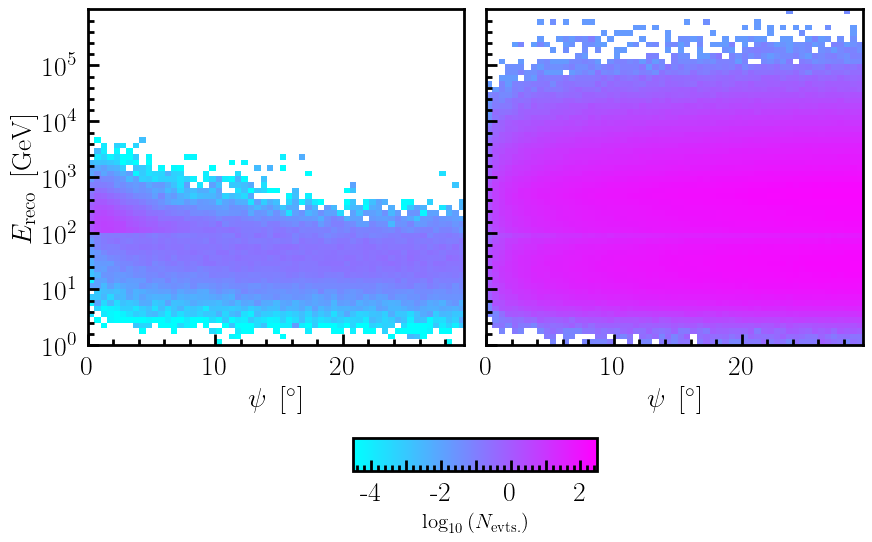

In [14]:
gs = GridSpec(2, 6, height_ratios=(5,0.5), hspace=0.5)

fig = plt.figure(figsize=(10, 6))
ax0 = fig.add_subplot(gs[0, 0:3])
ax1 = fig.add_subplot(gs[0, 3:])
ax2 = fig.add_subplot(gs[1, 2:4])

kwargs = {
    "vmin": vmin,
    "vmax": vmax,
    "xmin": 0,
    "xmax": 29.5,
#     "ylim": (0,6)
}

ax0, heatmap0 = plot_analysis_distribution_icrc(
    ps_nom_sig + osc_nom_sig.sum(axis=-1),
    cmap = "cool",
    ax=ax0,
    **kwargs
)

ax1, heatmap1 = plot_analysis_distribution_icrc(
    ps_nom_bg + osc_nom_bg.sum(axis=-1),
    cmap = "cool",
    ax=ax1,
    **kwargs
)
cbar = plt.colorbar(
    heatmap0,
    cax=ax2,
    orientation="horizontal",
)
cbar.set_label(label=r"$\log_{10}\left(N_{\mathrm{evts.}}\right)$", fontsize=15)
cbar.set_ticks([-4, -3,-2, -1, 0, 1, 2])
cbar.set_ticklabels([-4, "", -2, "", 0, "", 2])

ax1.set_yticklabels([])



plt.savefig("/data/user/jlazar/icrc_event_dist.pdf", transparent=True)
plt.show()

In [76]:
cbar.set_ticklabels?

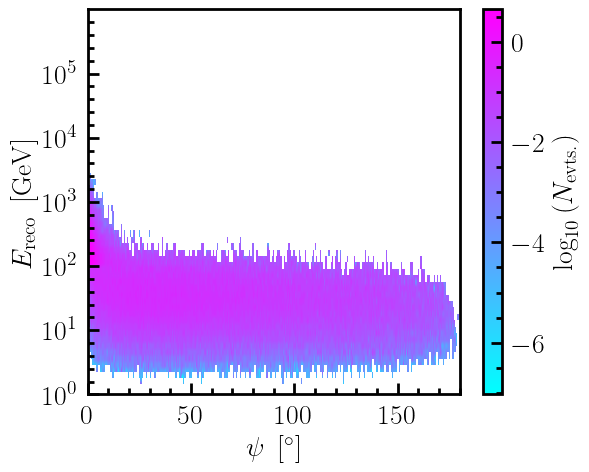

## Make distributions for technote

In [95]:
fig.add_gridspec?

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log10
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10


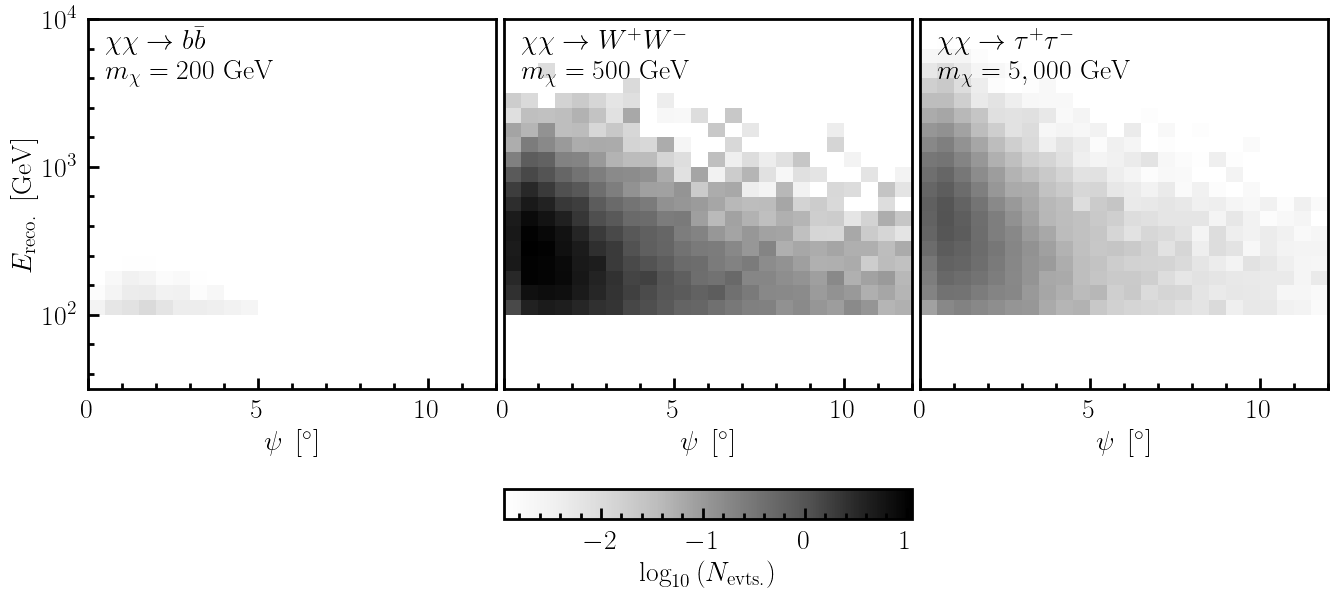

In [141]:
with h5.File(ps_mc_file, "r") as h5f:
    a = livetime * prepare_simulation_distribution(h5f, "5-200")
    b = livetime * prepare_simulation_distribution(h5f, "8-500")
    c = livetime * prepare_simulation_distribution(h5f, "11-5000")
    
with h5.File(oscnext_mc_file, "r") as h5f:
    d = livetime * prepare_simulation_distribution(h5f, "5-200")
    e = livetime * prepare_simulation_distribution(h5f, "8-500")
    f = livetime * prepare_simulation_distribution(h5f, "11-5000")
    

fig = plt.figure(figsize=(16, 6.5))
gs = fig.add_gridspec(2, 3, wspace=0.02, height_ratios=(6, 0.5), hspace=0.5)
axa = fig.add_subplot(gs[0, 0])
axb = fig.add_subplot(gs[0, 1])
axc = fig.add_subplot(gs[0, 2])
ax_cbar = fig.add_subplot(gs[1, 1])

axs = [axa, axb, axc]

cmap = "Greys"
vmax = np.log10(11.170499917329638)
vmin = np.log10(11.170499917329638)-4
xmax = 12

kwargs = {
    "extent":[0, 180, -3, 6],
    "vmin": vmin,
    "vmax": vmax,
    "cmap": cmap,
    "aspect": "auto"
}

ima = axa.imshow(np.log10(a.T[::-1]), **kwargs)
imb = axb.imshow(np.log10(b.T[::-1]), **kwargs)
imc = axc.imshow(np.log10(c.T[::-1]), **kwargs)
cbar = plt.colorbar(
    imc,
    cax=ax_cbar,
    use_gridspec=True,
    orientation="horizontal",
    label=r"$\log_{10}\left(N_{\mathrm{evts.}}\right)$"
)

axa.text(0.5, 3.8, r"$\chi\chi\rightarrow b\bar{b}$")
axa.text(0.5, 3.6, r"$m_{\chi}=200~\mathrm{GeV}$")

axb.text(0.5, 3.8, r"$\chi\chi\rightarrow W^{+}W^{-}$")
axb.text(0.5, 3.6, r"$m_{\chi}=500~\mathrm{GeV}$")

axc.text(0.5, 3.8, r"$\chi\chi\rightarrow \tau^{+}\tau^{-}$")
axc.text(0.5, 3.6, r"$m_{\chi}=5,000~\mathrm{GeV}$")

axb.set_yticklabels([])
axb.set_yticks([])
axc.set_yticklabels([])
axc.set_yticks([])

axa.set_ylabel(r"$E_{\mathrm{reco.}}~\left[\mathrm{GeV}\right]$")
axa.set_yticks([1, 2, 3, 4])
axa.set_yticklabels([r"$10^{1}$", r"$10^{2}$", r"$10^{3}$", r"$10^{4}$"])



for ax in axs:
    ax.set_xlim(0, 12)
    ax.set_ylim(1.5, 4)
    ax.set_xlabel(r"$\psi~\left[^{\circ}\right]$")

plt.savefig("./figures/ps_signal_triptych.pdf")
plt.show()

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log10
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10


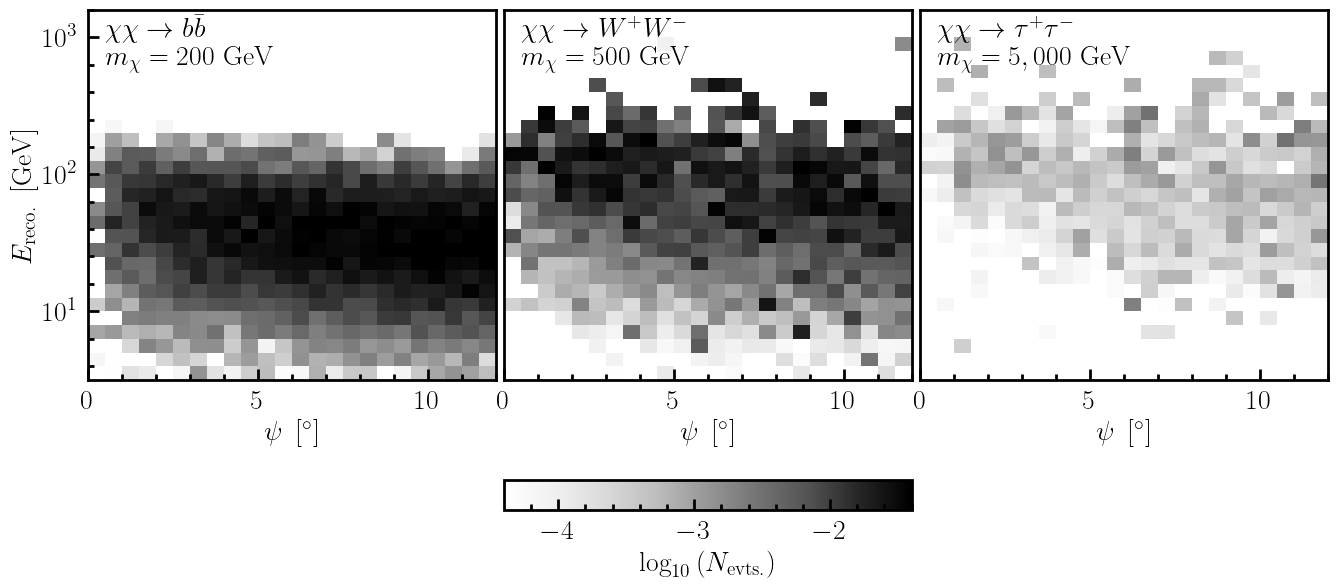

In [139]:
with h5.File(ps_mc_file, "r") as h5f:
    a = livetime * prepare_simulation_distribution(h5f, "5-200")
    b = livetime * prepare_simulation_distribution(h5f, "8-500")
    c = livetime * prepare_simulation_distribution(h5f, "11-5000")
    
with h5.File(oscnext_mc_file, "r") as h5f:
    d = livetime * prepare_simulation_distribution(h5f, "5-200")
    e = livetime * prepare_simulation_distribution(h5f, "8-500")
    f = livetime * prepare_simulation_distribution(h5f, "11-5000")
    

fig = plt.figure(figsize=(16, 6.5))
gs = fig.add_gridspec(2, 3, wspace=0.02, height_ratios=(6, 0.5), hspace=0.5)
axa = fig.add_subplot(gs[0, 0])
axb = fig.add_subplot(gs[0, 1])
axc = fig.add_subplot(gs[0, 2])
ax_cbar = fig.add_subplot(gs[1, 1])

axs = [axa, axb, axc]

cmap = "Greys"
vmax = np.log10(0.03983)
vmin = np.log10(0.03983) - 3
xmax = 12

kwargs = {
    "extent":[0, 180, -3, 6],
    "vmin": vmin,
    "vmax": vmax,
    "cmap": cmap,
    "aspect": "auto"
}

ima = axa.imshow(np.log10(d.sum(axis=-1).T[::-1]), **kwargs)
imb = axb.imshow(np.log10(e.sum(axis=-1).T[::-1]), **kwargs)
imc = axc.imshow(np.log10(f.sum(axis=-1).T[::-1]), **kwargs)
cbar = plt.colorbar(
    imc,
    cax=ax_cbar,
    use_gridspec=True,
    orientation="horizontal",
    label=r"$\log_{10}\left(N_{\mathrm{evts.}}\right)$"
)

axa.text(0.5, 3.0, r"$\chi\chi\rightarrow b\bar{b}$")
axa.text(0.5, 2.8, r"$m_{\chi}=200~\mathrm{GeV}$")

axb.text(0.5, 3.0, r"$\chi\chi\rightarrow W^{+}W^{-}$")
axb.text(0.5, 2.8, r"$m_{\chi}=500~\mathrm{GeV}$")

axc.text(0.5, 3.0, r"$\chi\chi\rightarrow \tau^{+}\tau^{-}$")
axc.text(0.5, 2.8, r"$m_{\chi}=5,000~\mathrm{GeV}$")

axb.set_yticklabels([])
axb.set_yticks([])
axc.set_yticklabels([])
axc.set_yticks([])

axa.set_ylabel(r"$E_{\mathrm{reco.}}~\left[\mathrm{GeV}\right]$")
axa.set_yticks([1, 2, 3, 4])
axa.set_yticklabels([r"$10^{1}$", r"$10^{2}$", r"$10^{3}$", r"$10^{4}$"])



for ax in axs:
    ax.set_xlim(0, 12)
    ax.set_ylim(0.5, 3.2)
    ax.set_xlabel(r"$\psi~\left[^{\circ}\right]$")

plt.savefig("./figures/osc_signal_triptych.pdf")
plt.show()

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


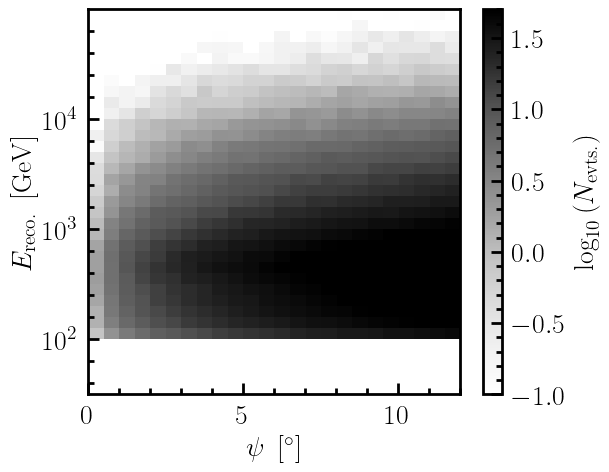

In [13]:
fig, ax = plt.subplots(figsize=(6,5))

cmap = "Greys"
vmax = 1.7
vmin = -1
xmax = 12

kwargs = {
    "extent":[0, 180, -3, 6],
    "vmin": vmin,
    "vmax": vmax,
    "cmap": cmap,
    "aspect": "auto"
}

im = ax.imshow(
    np.log10(ps_nom_bg.T[::-1]),
    **kwargs
)

ax.set_xlim(0, 12)
ax.set_ylabel(r"$E_{\mathrm{reco.}}~\left[\mathrm{GeV}\right]$")
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels([r"$10^{1}$", r"$10^{2}$", r"$10^{3}$", r"$10^{4}$"])
ax.set_xlim(0, 12)
ax.set_ylim(1.5, 5)
ax.set_xlabel(r"$\psi~\left[^{\circ}\right]$")

cbar = plt.colorbar(im, label=r"$\log_{10}\left(N_{\mathrm{evts.}}\right)$")

plt.savefig("figures/ps_background_12deg.pdf")

plt.show()

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


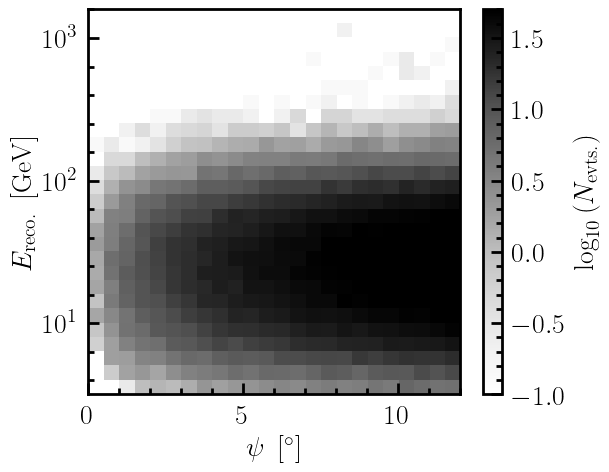

In [21]:
fig, ax = plt.subplots(figsize=(6,5))

cmap = "Greys"
vmax = 1.7
vmin = -1
xmax = 12

kwargs = {
    "extent":[0, 180, -3, 6],
    "vmin": vmin,
    "vmax": vmax,
    "cmap": cmap,
    "aspect": "auto"
}

im = ax.imshow(
    np.log10(osc_nom_bg.sum(axis=-1).T[::-1]),
    **kwargs
)

ax.set_xlim(0, 12)
ax.set_ylabel(r"$E_{\mathrm{reco.}}~\left[\mathrm{GeV}\right]$")
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels([r"$10^{1}$", r"$10^{2}$", r"$10^{3}$", r"$10^{4}$"])
ax.set_xlim(0, 12)
ax.set_ylim(0.5, 3.2)
ax.set_xlabel(r"$\psi~\left[^{\circ}\right]$")

cbar = plt.colorbar(im, label=r"$\log_{10}\left(N_{\mathrm{evts.}}\right)$")

plt.savefig("figures/osc_background_12deg.pdf")

plt.show()

In [22]:
with h5.File(oscnext_data_file, "r") as h5f:
    arr = np.zeros(h5f["oscNext_data_11_no_muon_0"].shape)
    for yr in [11,12,13,14,15,16,17,18,19,20,21]:
        arr += h5f[f"oscNext_data_{yr}_no_muon_0"]

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


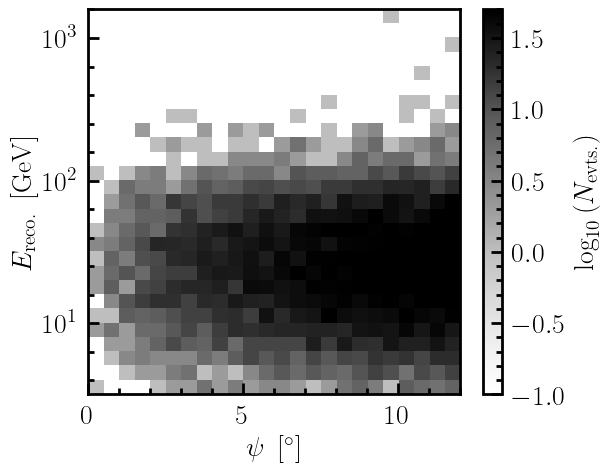

In [23]:
fig, ax = plt.subplots(figsize=(6,5))

cmap = "Greys"
vmax = 1.7
vmin = -1
xmax = 12

kwargs = {
    "extent":[0, 180, -3, 6],
    "vmin": vmin,
    "vmax": vmax,
    "cmap": cmap,
    "aspect": "auto"
}

im = ax.imshow(
    np.log10(arr.sum(axis=-1).T[::-1]),
    **kwargs
)

ax.set_xlim(0, 12)
ax.set_ylabel(r"$E_{\mathrm{reco.}}~\left[\mathrm{GeV}\right]$")
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels([r"$10^{1}$", r"$10^{2}$", r"$10^{3}$", r"$10^{4}$"])
ax.set_xlim(0, 12)
ax.set_ylim(0.5, 3.2)
ax.set_xlabel(r"$\psi~\left[^{\circ}\right]$")

cbar = plt.colorbar(im, label=r"$\log_{10}\left(N_{\mathrm{evts.}}\right)$")

plt.savefig("figures/osc_background_12deg_undersample.pdf")

plt.show()

In [10]:
with h5.File(ps_data_file, "r") as h5f:
    arr = np.zeros(h5f["IC86_2011_exp_0"].shape)
    for yr in [11,12,13,14,15,16,17,18,19,20,21]:
        arr += h5f[f"IC86_20{yr}_exp_0"]

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


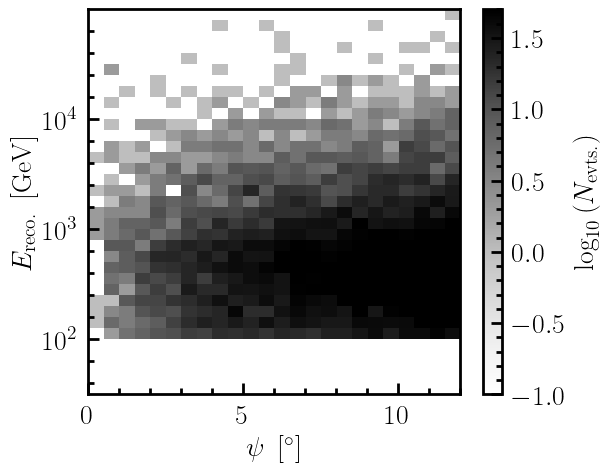

In [14]:
fig, ax = plt.subplots(figsize=(6,5))

cmap = "Greys"
vmax = 1.7
vmin = -1
xmax = 12

kwargs = {
    "extent":[0, 180, -3, 6],
    "vmin": vmin,
    "vmax": vmax,
    "cmap": cmap,
    "aspect": "auto"
}

im = ax.imshow(
    np.log10(arr.T[::-1]),
    **kwargs
)

ax.set_xlim(0, 12)
ax.set_ylabel(r"$E_{\mathrm{reco.}}~\left[\mathrm{GeV}\right]$")
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels([r"$10^{1}$", r"$10^{2}$", r"$10^{3}$", r"$10^{4}$"])
ax.set_xlim(0, 12)
ax.set_ylim(1.5, 5)
ax.set_xlabel(r"$\psi~\left[^{\circ}\right]$")

cbar = plt.colorbar(im, label=r"$\log_{10}\left(N_{\mathrm{evts.}}\right)$")

plt.savefig("figures/ps_background_12deg_undersample.pdf")

plt.show()

In [17]:
arr.sum() / ps_nom_bg.sum()

1.0

In [20]:
d = {}
with h5.File(oscnext_data_file, "r") as h5f:
    n = 0
    for yr in [11,12,13,14,15,16,17,18,19,20,21]:
        print(len([k for k in h5f.keys() if k.startswith(f"oscNext_data_{yr}_no_muon")]))

15
15
15
15
15
15
15
15
15
15
15
